In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np 

import re

In [2]:
pd.set_option('display.max_columns', None)                 
pd.set_option('display.max_rows', 100)  
pd.set_option('display.float_format', '{:.2f}'.format)  

In [3]:
df = pd.read_csv('../data/raw_data.csv') 

In [4]:
df = df.drop(columns=['Тип', 'Телефоны', 'Описание', 'Название ЖК', 'Серия дома', 'Ссылка на объявление'], axis = 1)  

In [5]:
# переименовываем столбцы
rename_dict = {
    'ID объявления': 'id',
    'Количество комнат': 'rooms_number',
    'Метро': 'metro',
    'Адрес': 'address',
    'Площадь, м2': 'area',
    'Дом': 'building',
    'Парковка': 'parking',
    'Цена': 'price',
    'Ремонт': 'renovation',
    'Площадь комнат, м2': 'rooms_area',
    'Балкон': 'balcony',
    'Окна': 'windows',
    'Санузел': 'bathroom',
    'Можно с детьми/животными': 'kids_pets',
    'Дополнительно': 'additional',
    'Высота потолков, м': 'ceiling_height',
    'Лифт': 'elevator',
    'Мусоропровод': 'garbage_chute',
}

df = df.rename(columns=rename_dict)
df.head(5)

,Unnamed: 0,ID объявления,rooms_number,metro,address,area,building,parking,price,renovation,rooms_area,balcony,windows,bathroom,kids_pets,additional,ceiling_height,elevator,garbage_chute
0,0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.00,"Пасс (4), Груз (1)",Да
1,1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.50,"Пасс (1), Груз (1)",Нет
2,2,271173086,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.20,Пасс (1),NaN
3,3,272197456,"4, Оба варианта",м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.20,Пасс (1),NaN
4,4,273614615,2,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.90,"Пасс (1), Груз (1)",Да


In [6]:
# Определяем какие признаки есть
df['rooms_number'].unique()

array(['4', '4, Оба варианта', '2', '3', '5, Оба варианта',
       '3, Изолированная', '5', '5, Изолированная', '2, Оба варианта',
       '3, Оба варианта', '6', '1', '4, Изолированная', '6, Оба варианта',
       '2, Изолированная', nan, '2, Смежная', '4, Смежная', '3, Смежная',
       '6, Изолированная', '1, Изолированная', '1, Оба варианта',
       '5, Смежная', '6, Смежная', '1, Смежная'], dtype=object)

In [7]:
#  Извлекаем числа, переводим во float, пустые заменяем медианной
df['rooms'] = df['rooms_number'].astype(str).str.extract(r'(\d+)').astype(float)
df['rooms'] = df['rooms'].fillna(df['rooms'].median())

In [8]:
# создаем новый столбец и добавляем типы: 'изолированная', 'смежная', 'оба варианта'
df['layout_type'] = 'неизвестен'
df.loc[df['rooms_number'].astype(str).str.contains('Изолированная', na=False), 'layout_type'] = 'изолированная'
df.loc[df['rooms_number'].astype(str).str.contains('Смежная', na=False), 'layout_type'] = 'смежная'
df.loc[df['rooms_number'].astype(str).str.contains('Оба варианта', na=False), 'layout_type'] = 'оба варианта'

In [9]:
# Смотрим насколько много некорректных данных
df['rooms_number'].astype(str).str.contains('1, Оба варианта').sum()

np.int64(4)

In [10]:
# сщздаем столбец с некорректными значениями и удаляем эти строки
wrong_type = (
    (df['rooms'] == 1) &
    df['rooms_number'].astype(str).str.contains('Оба варианта', na=False)
)
df = df.drop(df[wrong_type].index)

In [11]:
# Удаляем колонки со старыми данными
df = df.drop(['rooms_number'], axis = 1)

In [12]:
#  создаем новый столбец и удаляем строки, которые не содержат г.Москва, после чего удаляем и ноовыый столбец, поскольку в нем нет необходимости
df['city'] = df['address'].astype(str).str.contains('Москва')
df = df[df['city']]
df = df.drop(['address', 'city'], axis = 1)

In [13]:
# Извлекаем название метро инф-цию, которая находится внутри скобок(пешком или на автомобиле до метро)
df['metro_name'] = (df['metro'].astype(str).str.extract(r'м\.\s*([^(]+)')[0].str.strip())
df['metro_name'] = df['metro_name'].fillna('нет_метро')

df['time'] = df['metro'].astype(str).str.extract(r'\((.*?)\)')     # Извлекаем инф-цию, которая находится внутри скобок(пешком или на автомобиле до метро) 
df['time'].str.contains('пешком').value_counts()

time
True     17356
False     2033
Name: count, dtype: int64

In [14]:
# проверяем, что остав. данные = на машине
df['time'].str.contains('маш').value_counts()

time
False    17356
True      2033
Name: count, dtype: int64

In [15]:
#  извлекаем числа
df['time_to_metro'] = df['time'].astype(str).str.extract(r'(\d+)')
df['time_to_metro'] = df['time_to_metro'].astype(str).astype(float)

median_by_metro = df.groupby('metro_name')['time_to_metro'].median()                        #  группируем на званию метро и заполняем медианной, если нет данных по метро, то заполняем медианой по времени
df['time_to_metro'] = df['time_to_metro'].fillna(df['metro_name'].map(median_by_metro))
df['time_to_metro'] = df['time_to_metro'].fillna(df['time_to_metro'].median())

#  Создаем новый столбец 'by_car_by_walk', заполняем пропущенные модой
df.loc[df['time'].astype(str).str.contains('пешком', na=False), 'by_car_by_walk'] = 'пешком'
df.loc[df['time'].astype(str).str.contains('машин', na=False), 'by_car_by_walk'] = 'на машине'
df['by_car_by_walk'].fillna(df['by_car_by_walk'].mode()[0], inplace=True)


/tmp/ipykernel_11648/4287397206.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['by_car_by_walk'].fillna(df['by_car_by_walk'].mode()[0], inplace=True)


In [16]:
#  удаляем ненужные колонки
df = df.drop(columns=['time', 'metro'], axis = 1)  

In [17]:
# Обрабатываем колонку с площадью, берём только общую площадь
df['area'] = df['area'].astype(str).str.split('/').str[0]
df['area'] = df['area'].str.strip()
df['area'] = df['area'].str.replace(',', '.', regex=False)
df['area'] = pd.to_numeric(df['area'], errors='coerce')
df['area'] = df['area'].fillna(df['area'].median())

In [18]:
#  создаем врем. столбец 'building_temp' и извлекаем этаж, пропущенные значения заполняем медианной
df['building_temp'] = df['building'].astype(str)
df['floor'] = df['building_temp'].str.extract(r'^(\d+)')
df['floor'] = df['floor'].astype(float)
df['floor'] = df['floor'].fillna(df['floor'].median())

#  созд. столбец с общим количеством этажей
df['floors_total'] = df['building_temp'].str.extract(r'/(\d+)')
df['floors_total'] = df['floors_total'].astype(float)

In [19]:
#   Смотрим типы домов
df['building_temp'].str.replace(r'\d+/\d+,?\s*', '', regex=True).value_counts()

building_temp
Панельный              6679
Кирпичный              3696
Монолитный             3612
                       2971
Блочный                1689
Монолитно-кирпичный     872
Сталинский              141
старый фонд              68
Деревянный                5
-Монолитный               1
Щитовой                   1
Name: count, dtype: int64

In [20]:
#   Создаем типы домов
df['building_type'] = 'нет_данных'
df.loc[df['building_type'].str.contains('Панельный', na=False), 'building_type'] = 'Панельный'
df.loc[df['building_type'].str.contains('Кирпичный', na=False), 'building_type'] = 'Кирпичный'
df.loc[df['building_type'].str.contains('Монолитный', na=False), 'building_type'] = 'Монолитный'
df.loc[df['building_type'].str.contains('Блочный', na=False), 'building_type'] = 'Блочный'
df.loc[df['building_type'].str.contains('Монолитно-кирпичный', na=False), 'building_type'] = 'Монолитно-кирпичный'
df.loc[df['building_type'].str.contains('старый фонд', na=False), 'building_type'] = 'старый фонд'
df.loc[df['building_type'].str.contains('Деревянный ', na=False), 'building_type'] = 'Деревянный'
df.loc[df['building_type'].str.contains('-Монолитный', na=False), 'building_type'] = 'Монолитный'
df.loc[df['building_type'].str.contains('Щитовой ', na=False), 'building_type'] = 'Щитовой'

In [21]:
#  удаляем ненужные колонки
df = df.drop(columns=['building', 'building_temp'], axis = 1)  

In [22]:
df['parking'].unique()

array(['подземная', nan, 'наземная', 'открытая', 'многоуровневая',
       'на крыше'], dtype=object)

In [23]:
#   Заполняем пропуски у парковки
df['parking'] = df['parking'].fillna('нет_данных')

In [24]:
#  Извлекаем стоимость аренды
df = df[df['price'].str.contains('руб', case=False)].copy()
df['price_for_month'] = (df['price'].str.extract(r'(\d[\d\s]{3,})')[0].str.replace(' ', '', regex=False).astype(float))

#  Определяем необходим ли залог и заполняем пропуски
df['deposit'] = df['price'].str.extract(r'Залог\s*-\s*(\d+)').astype(float)
df['deposit'] = df['deposit'].fillna(0)

#  Смотрим вкл. ли коммунальные услуги и заполняем пропуски
df['communal_included'] = df['price'].str.contains('Коммунальные услуги включены', case=False, na=False)
df['communal_included'] = df['communal_included'].fillna(0)

#  Определяем необходима ли предоплата, заполняем пропуски
df['prepayment'] = df['price'].str.extract(r'Предоплата\s*(\d+)').astype(float)
df['prepayment'] = df['prepayment'].fillna(0)

#  Смотрим на срок аренды
df['rent_term'] = df['price'].str.extract(r'Срок аренды\s*-\s*([А-Яа-яA-Za-z]+)')

In [25]:
#  удаляем ненужные колонки
df = df.drop(columns=['price'], axis = 1)  

In [26]:
df['balcony'].unique()

array([nan, 'Балкон (1)', 'Балкон (3)', 'Лоджия (1)',
       'Балкон (2), Лоджия (3)', 'Балкон (1), Лоджия (1)', 'Балкон (2)',
       'Лоджия (2)', 'Балкон (3), Лоджия (3)', 'Балкон (3), Лоджия (1)',
       'Лоджия (3)', 'Балкон (1), Лоджия (2)', 'Балкон (2), Лоджия (1)',
       'Балкон (2), Лоджия (2)', 'Балкон (4)', 'Лоджия (4)',
       'Балкон (4), Лоджия (4)', 'Балкон (1), Лоджия (4)',
       'Балкон (1), Лоджия (3)'], dtype=object)

In [27]:
# Извлекаем кол-во балконов и заполняем пропущ.значения 
df['balcony_count'] = (df['balcony'].str.extract(r'Балкон\s*\((\d+)\)')[0].astype(float))
df['balcony_count'] = df['balcony_count'].fillna(0)

# Извлекаем кол-во лоджий и заполняем пропущ.значения 
df['loggia_count'] = (df['balcony'].str.extract(r'Лоджия\s*\((\d+)\)')[0].astype(float))
df['loggia_count'] = df['loggia_count'].fillna(0)

# Созд.общую колонку с наличием или отсутствием балконов/лоджий
df['balcony_loggia'] = ((df['balcony_count'] + df['loggia_count']) > 0)
df['balcony_loggia'] = df['balcony_loggia'].astype(bool)

df = df.drop(columns=['balcony'], axis = 1)  

In [28]:
df['renovation'].unique()

array(['Дизайнерский', 'Евроремонт', 'Косметический', nan, 'Без ремонта'],
      dtype=object)

In [29]:
#   Заполняем пропуски по ремонту
df['renovation'] = df['renovation'].fillna('нет_данных')

In [30]:
df['windows'].unique()

array([nan, 'На улицу и двор', 'Во двор', 'На улицу'], dtype=object)

In [31]:
#  Изылекаем данные по окнам, заполняем пропуски и удаляем старую колонку
df['windows_to_street'] = df['windows'].str.contains('улицу', na=False).astype(int)
df['windows_to_yard'] = df['windows'].str.contains('двор', na=False).astype(int)
df['windows_mixed'] = ((df['windows_to_street'] == 1) & (df['windows_to_yard'] == 1)).astype(int)
df = df.drop(columns=['windows'], axis = 1)  

In [32]:
df['bathroom'].unique()

array([nan, 'Совмещенный (2), Раздельный (1)', 'Совмещенный (3)',
       'Совмещенный (2)', 'Совмещенный (1), Раздельный (1)',
       'Совмещенный (1)', 'Совмещенный (2), Раздельный (2)',
       'Раздельный (2)', 'Раздельный (1)', 'Раздельный (3)',
       'Совмещенный (4)', 'Совмещенный (3), Раздельный (1)',
       'Раздельный (4)', 'Совмещенный (1), Раздельный (2)',
       'Совмещенный (2), Раздельный (4)',
       'Совмещенный (1), Раздельный (3)',
       'Совмещенный (3), Раздельный (3)',
       'Совмещенный (4), Раздельный (2)',
       'Совмещенный (2), Раздельный (3)',
       'Совмещенный (4), Раздельный (1)',
       'Совмещенный (3), Раздельный (2)'], dtype=object)

In [33]:
#  Извлекаем данные по ванне, заполняем пропуски и удаляем старую колонку
df['bathroom_combined'] = (df['bathroom'].str.extract(r'Совмещенный\s*\((\d+)\)')[0].astype(float).fillna(0))
df['bathroom_separate'] = (df['bathroom'].str.extract(r'Раздельный\s*\((\d+)\)')[0].astype(float).fillna(0))
df['bathroom_total'] = df['bathroom_combined'] + df['bathroom_separate']
df = df.drop(columns=['bathroom'], axis = 1)  

In [34]:
df['kids_pets'].unique()

array(['Можно с детьми, Можно с животными', 'Можно с детьми',
       'Можно с животными', nan], dtype=object)

In [35]:
#  Изылекаем данные по детям и животным, заполняем пропуски и удаляем старую колонку
df['kids_allowed'] = df['kids_pets'].str.contains('дет', na=False).astype(int)
df['pets_allowed'] = df['kids_pets'].str.contains('живот', na=False).astype(int)
df['kids_and_pets'] = df['kids_allowed'] + df['pets_allowed']
df = df.drop(columns=['kids_pets'], axis = 1)

In [36]:
df['additional'].unique()

array(['Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет, Телефон',
       'Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет',
       'Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Посудомоечная машина, Телевизор, Холодильник, Интернет',
       'Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник',
       'Мебель в комнатах, Мебель на кухне, Ванна, Стиральная машина, Посудомоечная машина, Телевизор, Холодильник, Интернет, Телефон',
       'Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Холодильник, Интернет',
       'Мебель на кухне, Ванна, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник,

In [37]:
#  Создаем дополнительные колонки на основе имеющихся признаков
feature_map = {
    'Ванна': 'bath',
    'Душевая кабина': 'shower',
    'Стиральная машина': 'washing_machine',
    'Посудомоечная машина': 'dishwasher',
    'Холодильник': 'fridge',
    'Телевизор': 'tv',
    'Интернет': 'internet',
    'Телефон': 'phone',
    'Кондиционер': 'air_conditioner',
    'Мебель в комнатах': 'furniture_rooms',
    'Мебель на кухне': 'furniture_kitchen'
}

for ru, en in feature_map.items():
    df[en] = df['additional'].str.contains(ru, na=False).astype(int)

df = df.drop(columns=['additional'])

In [38]:
df['rooms_area'].unique()

array([nan, '25 25 20 25', '14-42-20-19', ..., '32+13,6-18,7', '13+12',
       '26,2+15,5-22,0'], shape=(3453,), dtype=object)

In [39]:
#  Данная колонка является неинформативной, удаляем
df = df.drop(columns=['rooms_area'], axis = 1)

In [40]:
df['ceiling_height'].unique()

array([  3.  ,   3.5 ,   3.2 ,   3.9 ,    nan, 310.  ,   3.3 ,   4.  ,
         3.15,   4.15,   3.8 ,   3.35,   4.05,   3.6 ,   3.1 ,   4.2 ,
         2.8 ,   5.5 ,   2.5 ,   3.4 ,   2.4 ,   2.74,   2.6 ,   2.7 ,
         2.64,   2.75, 260.  ,   2.48,   2.52,   2.77,   2.78,   6.  ,
         2.95,   2.43,   2.9 ,   2.84,   2.65,   2.54,   2.85,   2.58,
         3.7 ,   4.6 ,   2.55,   2.66,   2.68,   2.73,  28.  ,   5.  ,
         3.25,   4.5 , 264.  ,   2.57,  27.  ,   2.72,   2.3 ,   3.05,
         3.07,   3.92,   2.86,   2.93,   2.94,   3.55,   2.67,  12.8 ,
         4.1 ,  26.  ,   2.76,   2.62,   2.87,   5.1 , 320.  ,   4.7 ,
       265.  ,   2.51,   2.63,   2.  ,   2.88,   2.56,   2.81,   3.08,
         3.11,   5.8 ,   2.45,   2.97,  25.  ,   2.1 , 280.  ,   3.24,
         3.21,   1.2 ])

In [41]:
# 1. Создаём новую колонку для очищенных данных
df['ceiling'] = df['ceiling_height']

#  Если у нас большие цифры, делим на 100
df.loc[df['ceiling'] > 10, 'ceiling'] = df['ceiling'] / 100

#  Если высота меньше 2,2 и больше 5,5 признаем данные непригодными и заполняем медианной
df.loc[(df['ceiling'] < 2.2) | (df['ceiling'] > 5.5), 'ceiling'] = pd.NA
df['ceiling'] = df['ceiling'].fillna(df['ceiling'].median())

df = df.drop(columns=['ceiling_height'])

In [42]:
#  Создаем отдельно отдельно столбцы с типом лифта и наличием хоть какого-то лифта
df['elevator_pass'] = df['elevator'].str.extract(r'Пасс\s*\((\d+)\)').astype(float).fillna(0)
df['elevator_freight'] = df['elevator'].str.extract(r'Груз\s*\((\d+)\)').astype(float).fillna(0)
df['elevator_any'] = ((df['elevator_pass'] > 0) | (df['elevator_freight'] > 0)).astype(int)
df = df.drop(columns=['elevator'])

In [43]:
df['garbage_chute'].unique()

array(['Да', 'Нет', nan], dtype=object)

In [44]:
#  Заполняем пустые значения
df['garbage_chute'] = df['garbage_chute'].fillna('нет_данных')

In [45]:
df.head(5)

,Unnamed: 0,ID объявления,area,parking,renovation,garbage_chute,rooms,layout_type,metro_name,time_to_metro,by_car_by_walk,floor,floors_total,building_type,price_for_month,deposit,communal_included,prepayment,rent_term,balcony_count,loggia_count,balcony_loggia,windows_to_street,windows_to_yard,windows_mixed,bathroom_combined,bathroom_separate,bathroom_total,kids_allowed,pets_allowed,kids_and_pets,bath,shower,washing_machine,dishwasher,fridge,tv,internet,phone,air_conditioner,furniture_rooms,furniture_kitchen,ceiling,elevator_pass,elevator_freight,elevator_any
0,0,271271157,200.00,подземная,Дизайнерский,Да,4.00,неизвестен,Смоленская,9.00,пешком,5.00,16.00,нет_данных,500000.00,500000.00,True,1.00,Длительный,0.00,0.00,False,0,0,0,0.00,0.00,0.00,1,1,2,1,1,1,1,1,1,1,1,1,1,1,3.00,4.00,1.00,1
1,1,271634126,198.00,подземная,Дизайнерский,Нет,4.00,неизвестен,Смоленская,8.00,пешком,5.00,16.00,нет_данных,500000.00,500000.00,True,1.00,Длительный,0.00,0.00,False,1,1,1,2.00,1.00,3.00,1,0,1,1,1,1,1,1,1,1,0,1,1,1,3.50,1.00,1.00,1
2,2,271173086,200.00,подземная,Евроремонт,нет_данных,4.00,оба варианта,Смоленская,7.00,пешком,5.00,16.00,нет_данных,500000.00,500000.00,False,1.00,Длительный,0.00,0.00,False,1,1,1,3.00,0.00,3.00,1,0,1,1,1,1,1,1,1,1,1,1,1,1,3.20,1.00,0.00,1
3,3,272197456,170.00,подземная,Евроремонт,нет_данных,4.00,оба варианта,Смоленская,3.00,пешком,5.00,6.00,нет_данных,400000.00,400000.00,False,1.00,Длительный,0.00,0.00,False,1,1,1,3.00,0.00,3.00,0,1,1,1,1,1,1,1,1,1,1,1,1,1,3.20,1.00,0.00,1
4,4,273614615,58.00,нет_данных,Евроремонт,Да,2.00,неизвестен,Арбатская,7.00,пешком,12.00,26.00,нет_данных,225000.00,225000.00,True,1.00,Длительный,0.00,0.00,False,1,1,1,2.00,0.00,2.00,0,0,0,1,1,1,1,1,1,1,0,0,1,1,3.90,1.00,1.00,1


In [46]:
df.to_csv("../data/cleaned_data.csv", index=False, encoding="utf-8-sig")

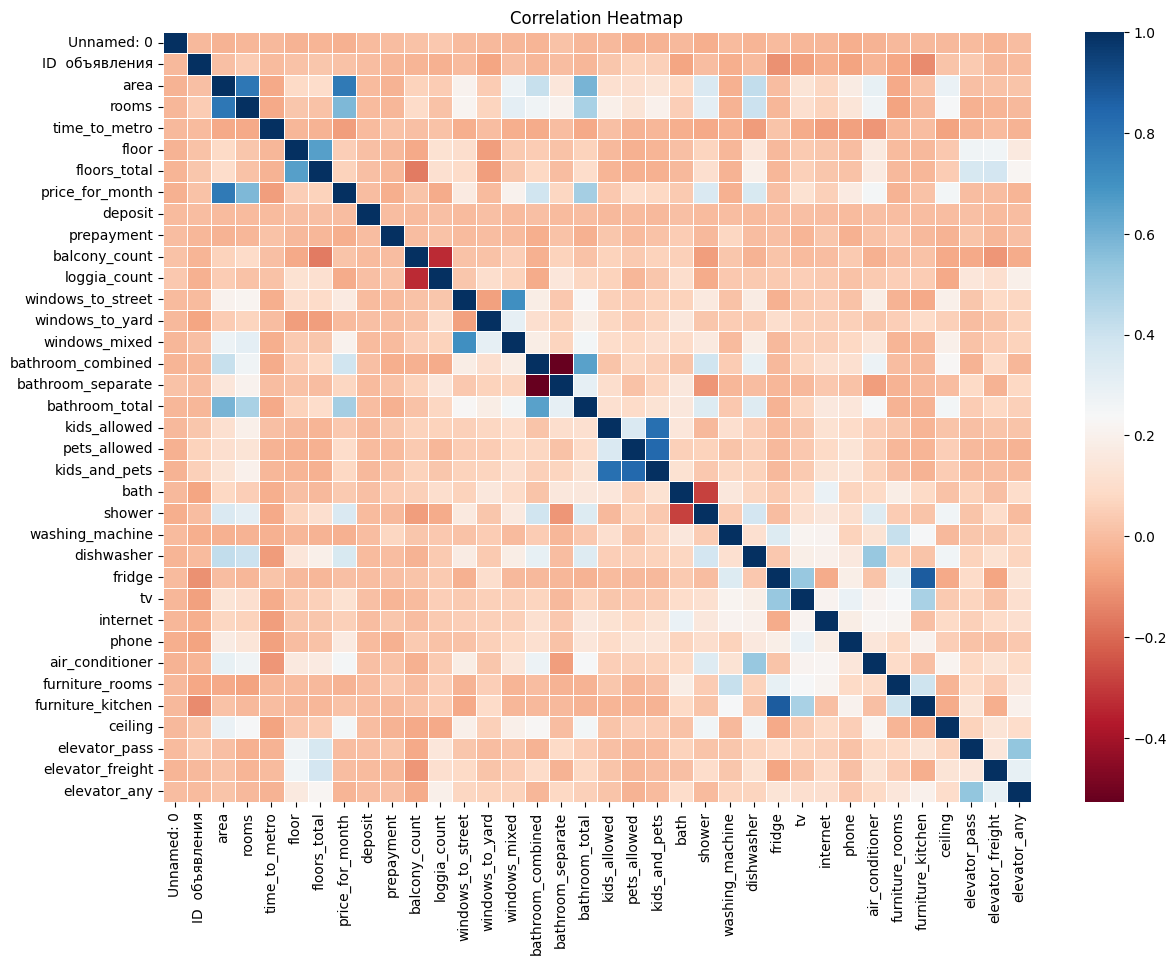

In [47]:
#  Смотрим на корреляции, чтобы понять какие еще данные нам необходимы
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(14, 10))
sns.heatmap(num_df.corr(), annot=False, cmap="RdBu", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Корреляционный анализ используется как инструмент разведочного анализа. Много отдельных удобств показывают слабую корреляцию, поэтому их необходимо агрегировать. Так же мы наблюдаем небольшое количество сильных корреляций, в связи с чем необходимо создать дополнительные данные.

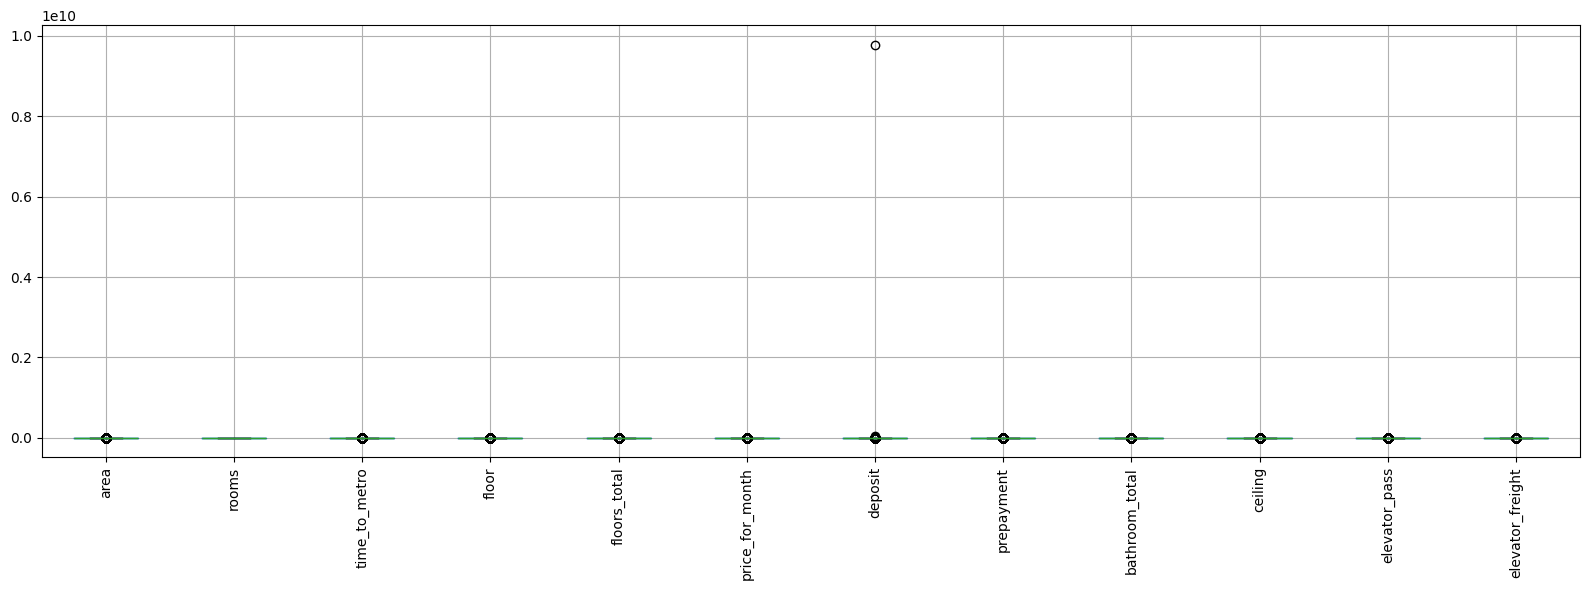

In [48]:
# Смотрим на и выбираем только числовые колонки, исключая id и бинарные
exclude = ['ID  объявления', 'Unnamed: 0']
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = [col for col in num_cols if col not in exclude and df[col].nunique() > 5]

plt.figure(figsize=(16, 6))
df[num_cols].boxplot(rot=90)
plt.tight_layout()
plt.show()

In [49]:
df['deposit'].sort_values(ascending=False).head(10) #  Данныйпризнак мешает корректному анализу и поскольку залог на влият на стоимость, скорее стоимость влияеет на залог - удаляем

4501    9779779042.00
21231     50000000.00
22995      4213000.00
3390       3000000.00
4766       3000000.00
14238      3000000.00
4715       3000000.00
14237      3000000.00
14236      2500000.00
4785       2500000.00
Name: deposit, dtype: float64

In [50]:
df = df.drop(columns=['deposit'])

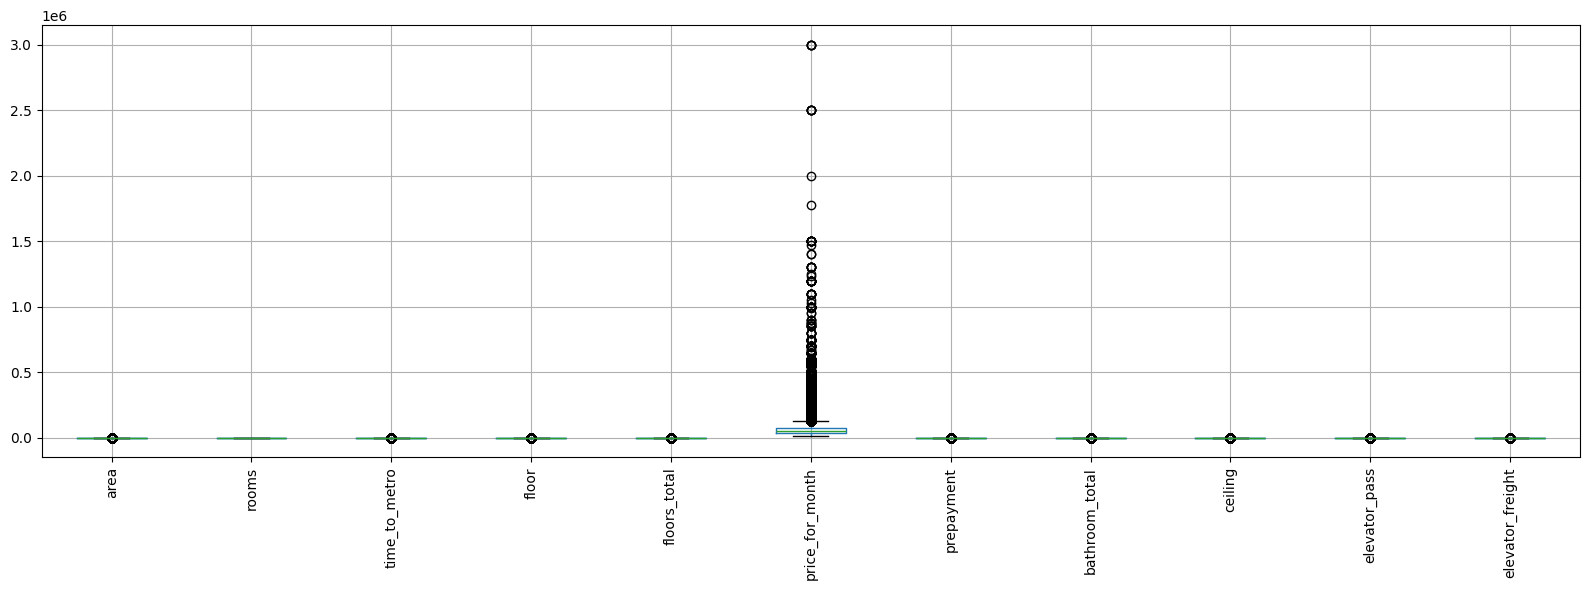

In [51]:
exclude = ['ID  объявления', 'Unnamed: 0']
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = [col for col in num_cols if col not in exclude and df[col].nunique() > 5]

plt.figure(figsize=(16, 6))
df[num_cols].boxplot(rot=90)
plt.tight_layout()
plt.show()

Самые большие выбросы мы наблюдаем в стоимости аренды и это вполне может отвечать рыночным условиям. Однако в дальнейшем обучении такие данные могут исказить результаты. Поэтому их необходимо откорректировать.

In [52]:
df['log_price'] = np.log1p(df['price_for_month'])

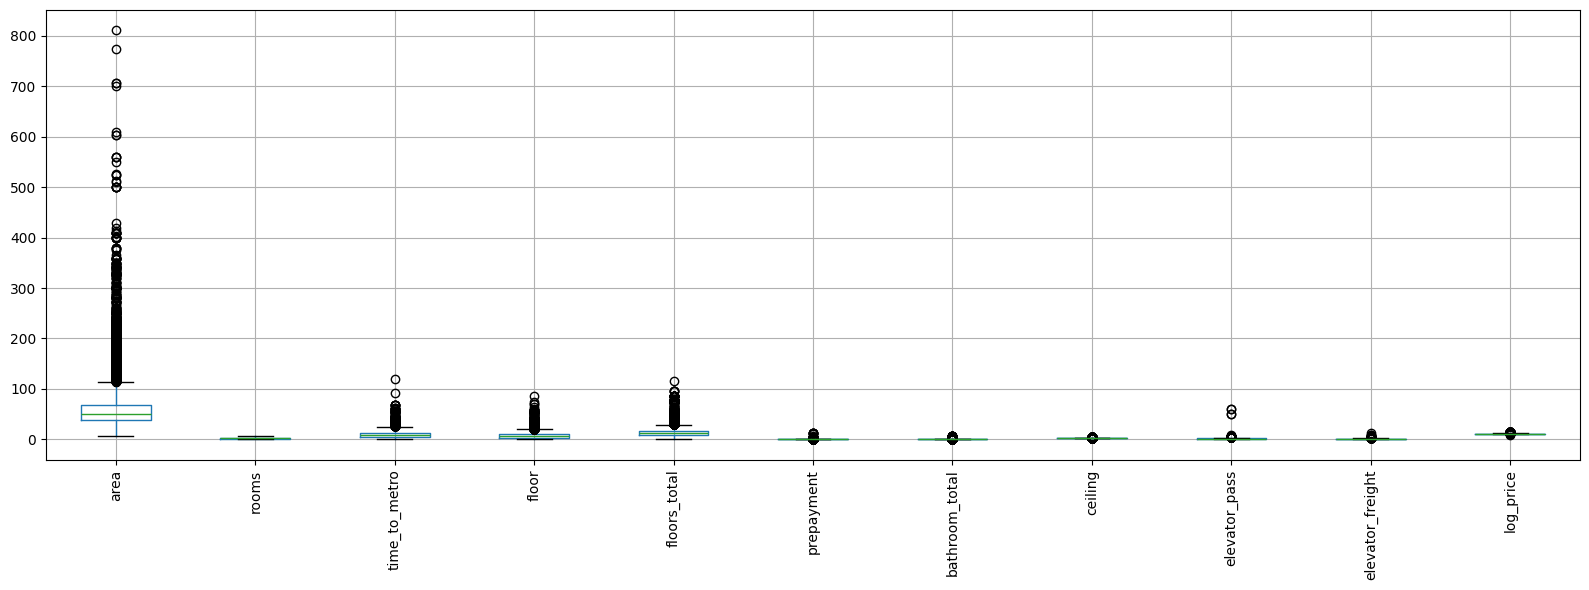

In [53]:
exclude = ['ID  объявления', 'Unnamed: 0', 'price_for_month']
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = [col for col in num_cols if col not in exclude and df[col].nunique() > 5]

plt.figure(figsize=(16, 6))
df[num_cols].boxplot(rot=90)
plt.tight_layout()
plt.show()

Мы неблюдаем выбросы в данных по времени до метро, это означает, что указанные квартиры находятся далеко, что вполне возможно для Москвы.
Так же есть квартиры выше основной массы, что вполне допустимо, поскольку в Москве большое количество высоток, однако небходимо проверить есть ли в данном датафрейме этаже выше самых зданий и если да, то удалить.
В лифтах так же есть выбросы, поскольку там в том числе много бинарных значений.

In [54]:
df[df['floor'] > df['floors_total']]
df = df[df['floor'] <= df['floors_total']]

In [55]:
# Добовляем данные и удаляем предыдущую стоимость аренды:
df['price_per_room'] = df['price_for_month'] / df['rooms']
df['price_per_m2'] = df['price_for_month'] / df['area']
df = df.drop(columns=['price_for_month'])

In [56]:
df.head(5)

,Unnamed: 0,ID объявления,area,parking,renovation,garbage_chute,rooms,layout_type,metro_name,time_to_metro,by_car_by_walk,floor,floors_total,building_type,communal_included,prepayment,rent_term,balcony_count,loggia_count,balcony_loggia,windows_to_street,windows_to_yard,windows_mixed,bathroom_combined,bathroom_separate,bathroom_total,kids_allowed,pets_allowed,kids_and_pets,bath,shower,washing_machine,dishwasher,fridge,tv,internet,phone,air_conditioner,furniture_rooms,furniture_kitchen,ceiling,elevator_pass,elevator_freight,elevator_any,log_price,price_per_room,price_per_m2
0,0,271271157,200.00,подземная,Дизайнерский,Да,4.00,неизвестен,Смоленская,9.00,пешком,5.00,16.00,нет_данных,True,1.00,Длительный,0.00,0.00,False,0,0,0,0.00,0.00,0.00,1,1,2,1,1,1,1,1,1,1,1,1,1,1,3.00,4.00,1.00,1,13.12,125000.00,2500.00
1,1,271634126,198.00,подземная,Дизайнерский,Нет,4.00,неизвестен,Смоленская,8.00,пешком,5.00,16.00,нет_данных,True,1.00,Длительный,0.00,0.00,False,1,1,1,2.00,1.00,3.00,1,0,1,1,1,1,1,1,1,1,0,1,1,1,3.50,1.00,1.00,1,13.12,125000.00,2525.25
2,2,271173086,200.00,подземная,Евроремонт,нет_данных,4.00,оба варианта,Смоленская,7.00,пешком,5.00,16.00,нет_данных,False,1.00,Длительный,0.00,0.00,False,1,1,1,3.00,0.00,3.00,1,0,1,1,1,1,1,1,1,1,1,1,1,1,3.20,1.00,0.00,1,13.12,125000.00,2500.00
3,3,272197456,170.00,подземная,Евроремонт,нет_данных,4.00,оба варианта,Смоленская,3.00,пешком,5.00,6.00,нет_данных,False,1.00,Длительный,0.00,0.00,False,1,1,1,3.00,0.00,3.00,0,1,1,1,1,1,1,1,1,1,1,1,1,1,3.20,1.00,0.00,1,12.90,100000.00,2352.94
4,4,273614615,58.00,нет_данных,Евроремонт,Да,2.00,неизвестен,Арбатская,7.00,пешком,12.00,26.00,нет_данных,True,1.00,Длительный,0.00,0.00,False,1,1,1,2.00,0.00,2.00,0,0,0,1,1,1,1,1,1,1,0,0,1,1,3.90,1.00,1.00,1,12.32,112500.00,3879.31


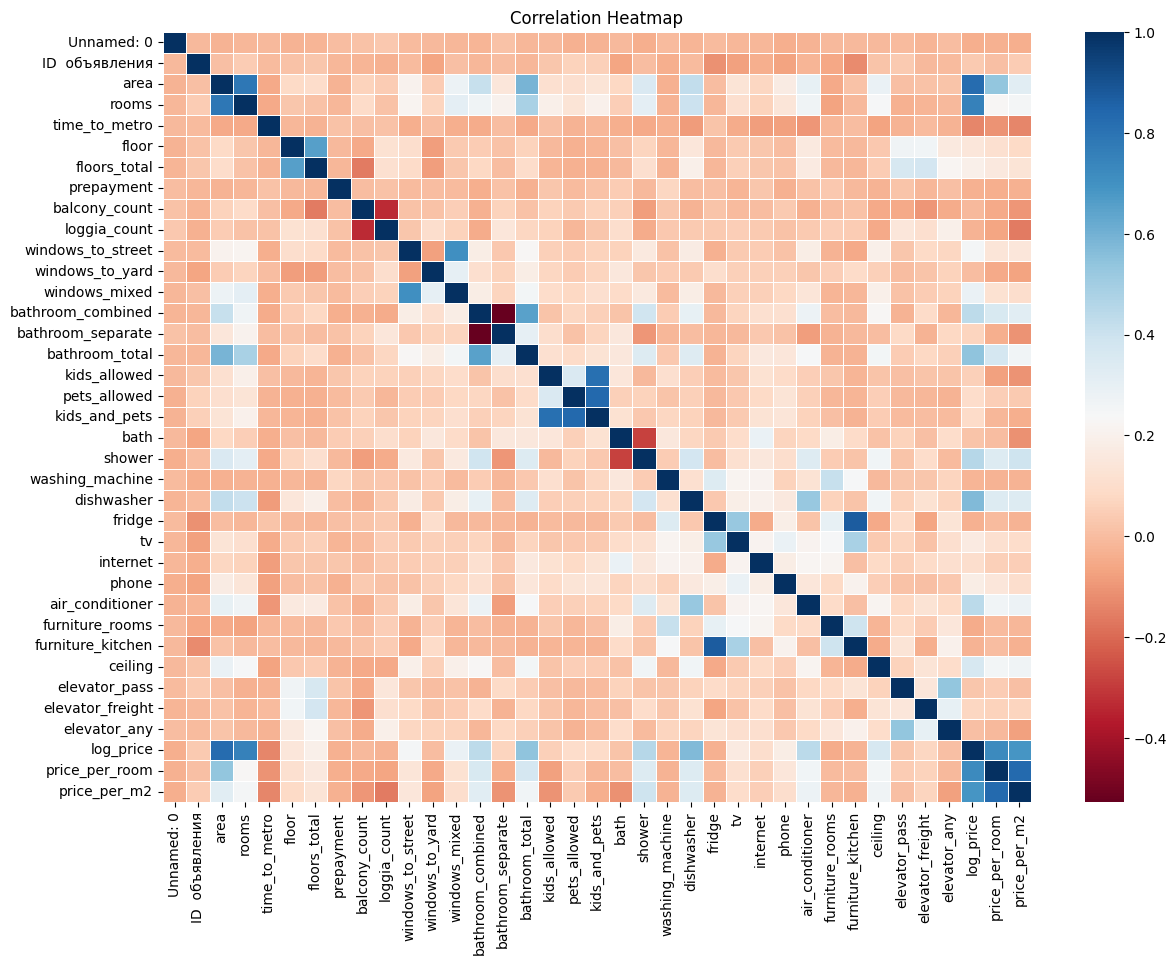

In [57]:
#  Смотрим на корреляции, после дополнения данных
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(14, 10))
sns.heatmap(num_df.corr(), annot=False, cmap="RdBu", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [58]:
df = df.drop(columns=['Unnamed: 0', 'price_per_room', 'price_per_m2', 'kids_and_pets', 'balcony_loggia', 'floors_total', 'bathroom_total', 'elevator_any'])
#  'price_per_room', 'price_per_m2' удаляем, поскольку они были вычисленны лишь для наглядности и уже содержат целевую переменную
#  'kids_and_pets', 'balcony_loggia' дублирует два предыдущих признака
#  'floors_total'  мало влияния

In [59]:
categorical_cols = [
    'parking',
    'renovation',
    'garbage_chute',
    'by_car_by_walk',
    'communal_included',
    'rent_term',
    'layout_type',
    'building_type',
    'metro_name'
]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [60]:
df.head(5)

,ID объявления,area,rooms,time_to_metro,floor,prepayment,balcony_count,loggia_count,windows_to_street,windows_to_yard,windows_mixed,bathroom_combined,bathroom_separate,kids_allowed,pets_allowed,bath,shower,washing_machine,dishwasher,fridge,tv,internet,phone,air_conditioner,furniture_rooms,furniture_kitchen,ceiling,elevator_pass,elevator_freight,log_price,parking_на крыше,parking_наземная,parking_нет_данных,parking_открытая,parking_подземная,renovation_Дизайнерский,renovation_Евроремонт,renovation_Косметический,renovation_нет_данных,garbage_chute_Нет,garbage_chute_нет_данных,by_car_by_walk_пешком,communal_included_True,rent_term_На,layout_type_неизвестен,layout_type_оба варианта,layout_type_смежная,metro_name_Автозаводская,metro_name_Академическая,metro_name_Александровский сад,metro_name_Алексеевская,metro_name_Алма-Атинская,metro_name_Алтуфьево,metro_name_Аминьевская,metro_name_Андроновка,metro_name_Аннино,metro_name_Арбатская,metro_name_Аэропорт,metro_name_Бабушкинская,metro_name_Багратионовская,metro_name_Балтийская,metro_name_Баррикадная,metro_name_Бауманская,metro_name_Беговая,metro_name_Белокаменная,metro_name_Беломорская,metro_name_Белорусская,metro_name_Беляево,metro_name_Бескудниково,metro_name_Бибирево,metro_name_Библиотека им. Ленина,metro_name_Битца,metro_name_Битцевский парк,metro_name_Борисово,metro_name_Боровицкая,metro_name_Боровское шоссе,metro_name_Ботанический сад,metro_name_Братиславская,metro_name_Бульвар Адмирала Ушакова,metro_name_Бульвар Дмитрия Донского,metro_name_Бульвар Рокоссовского,metro_name_Бунинская аллея,metro_name_Бутово,metro_name_Бутырская,metro_name_ВДНХ,metro_name_Варшавская,metro_name_Верхние Лихоборы,metro_name_Верхние котлы,metro_name_Владыкино,metro_name_Водный стадион,metro_name_Войковская,metro_name_Волгоградский проспект,metro_name_Волжская,metro_name_Волоколамская,metro_name_Воробьевы горы,metro_name_Воронцовская,metro_name_Выставочная,metro_name_Выставочный центр,metro_name_Выхино,metro_name_Говорово,metro_name_Гражданская,metro_name_Давыдково,metro_name_Дегунино,metro_name_Деловой центр,metro_name_Депо,metro_name_Динамо,metro_name_Дмитровская,metro_name_Добрынинская,metro_name_Долгопрудная,metro_name_Домодедовская,metro_name_Достоевская,metro_name_Дубровка,metro_name_Жулебино,metro_name_ЗИЛ,metro_name_Зорге,metro_name_Зюзино,metro_name_Зябликово,metro_name_Измайлово,metro_name_Измайловская,metro_name_Каланчёвская,metro_name_Калитники,metro_name_Калужская,metro_name_Кантемировская,metro_name_Каховская,metro_name_Каширская,metro_name_Киевская,metro_name_Китай-город,metro_name_Кожуховская,metro_name_Коломенская,metro_name_Комсомольская,metro_name_Коньково,metro_name_Коптево,metro_name_Косино,metro_name_Котельники,metro_name_Красногвардейская,metro_name_Краснопресненская,metro_name_Красносельская,metro_name_Красные ворота,metro_name_Красный Балтиец,metro_name_Красный Строитель,metro_name_Крестьянская застава,metro_name_Кропоткинская,metro_name_Крылатское,metro_name_Крымская,metro_name_Кубанская,metro_name_Кузнецкий мост,metro_name_Кузьминки,metro_name_Кунцевская,metro_name_Курская,metro_name_Курьяново,metro_name_Кутузовская,metro_name_Ленинский проспект,metro_name_Лермонтовский проспект,metro_name_Лесопарковая,metro_name_Лефортово,metro_name_Лианозово,metro_name_Лихоборы,metro_name_Локомотив,metro_name_Ломоносовский проспект,metro_name_Лубянка,metro_name_Лужники,metro_name_Лухмановская,metro_name_Люблино,metro_name_Марк,metro_name_Марксистская,metro_name_Марьина роща,metro_name_Марьино,metro_name_Маяковская,metro_name_Медведково,metro_name_Международная,metro_name_Менделеевская,metro_name_Минская,metro_name_Митино,metro_name_Мичуринский проспект,metro_name_Мневники,metro_name_Молодежная,metro_name_Москва-Товарная,metro_name_Москворечье,metro_name_Мякинино,metro_name_Нагатинская,metro_name_Нагорная,metro_name_Народное ополчение,metro_name_Нахабино,metro_name_Нахимовский проспект,metro_name_Некрасовка,metro_name_Немчиновка,metro_name_Нижегородская,metro_name_Новаторская,metro_name_Ново

In [61]:
df.to_csv("../data/stars_data.csv", index=False, encoding="utf-8-sig")